In [1]:
# Galib, Marnim
# 1001-427-030
# 2017-04-15
# Assignment_04_01

# Task 1

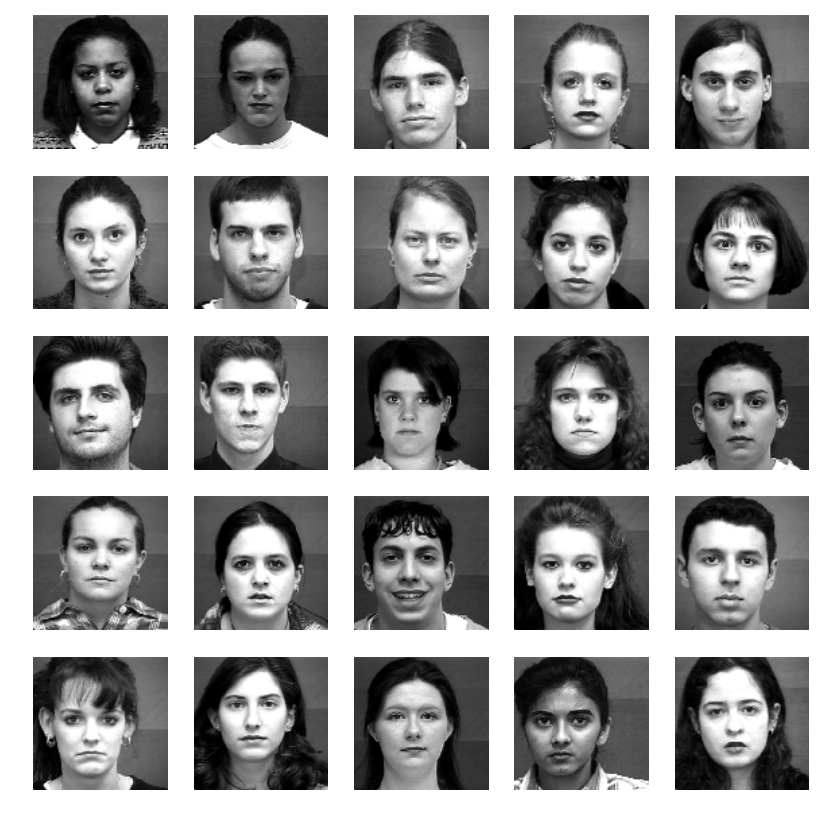

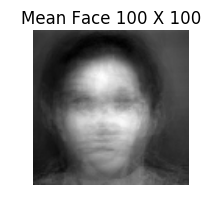

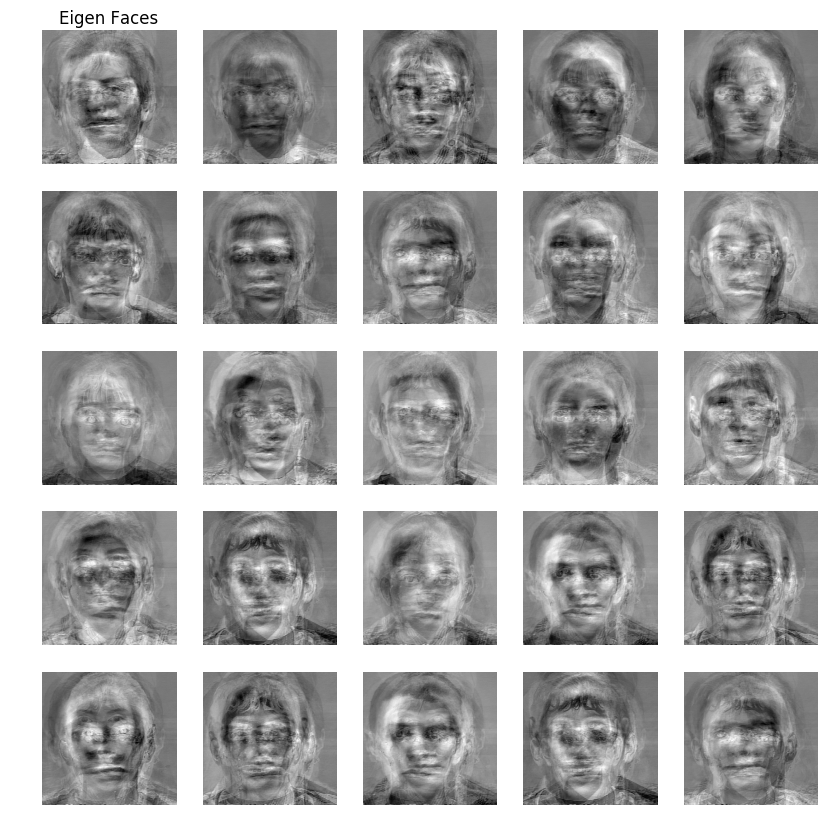

In [2]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.colors
from skimage import data
import scipy
import json
from numpy import linalg as LA


# PRINT INPUT IMAGES (100 x 100)
path1 = "Eigenfaces/Train/" 
faces = []

fig1, axes_array = plt.subplots(5, 5)
fig1.set_size_inches(10,10)
axes_array=np.ravel(axes_array)

listing = os.listdir(path1)  
i = 0
for file in listing:
    input_image = Image.open(path1 + file).convert("L")
    input_image_float = np.asarray(input_image,dtype=float)
    gray_image_float=input_image_float/255.0
    height, width = gray_image_float.shape
    my_image_1d = gray_image_float.flatten()
    faces.append(my_image_1d)
    resized_image = input_image.resize((100, 100))
    image_plot = axes_array[i].imshow(resized_image, cmap=plt.cm.gray) 
    axes_array[i].axis('off')
    i = i + 1

plt.show()

testfaces = []
jj = 0
for testfile in glob.glob('Eigenfaces/Test/*.jpg'):
    #print(testfile)
    test_image = Image.open(testfile).convert("L")
    test_image_float = np.asarray(test_image,dtype=float)
    test_image_gray = test_image_float/255.0
    height, width = test_image_gray.shape
    test_image_1d = test_image_gray.flatten()
    testfaces.append(test_image_1d)
    jj = jj + 1

testfaces_array = np.array(testfaces)
global no_of_testing_samples
no_of_testing_samples = len(testfaces_array)

# MEAN FACE IMAGE
faces_array = np.array(faces)
mean_value = np.mean(faces_array,axis = 0)
#mean_value = np.dot(faces_array.T, mean_value1)
mean_face_image = np.reshape(mean_value,(height, width))
img = Image.fromarray(mean_face_image)
resized_mean_face = img.resize((100, 100))
global no_of_trainig_samples
no_of_trainig_samples = len(faces_array)

fig2, axes_array = plt.subplots(1, 1)
fig2.set_size_inches(2,2)
axes_array=np.ravel(axes_array)
a = np.copy(mean_value).reshape(height, width)
norm_mean_face = (((a - a.min()) / (a.max() - a.min())) * 254.9).astype(np.uint8)
mean_img = Image.fromarray(norm_mean_face)
mean_img = mean_img.resize((100,100))
#image_plot = axes_array[0].imshow(a, cmap=plt.cm.gray) # Show the original image
image_plot = axes_array[0].imshow(mean_img, cmap=plt.cm.gray) # Show the original image

axes_array[0].set(title='Mean Face 100 X 100')
axes_array[0].axis('off')
plt.show()


zero_mean_faces = np.zeros((len(faces_array),len(faces_array.T)))
face_mean_value = np.mean(faces_array,axis = 1)

for i in range (0,len(faces_array)):
    zero_mean_faces[i] = faces_array[i] - mean_value

AtransposeA = np.dot(zero_mean_faces,zero_mean_faces.T)
covA = AtransposeA/no_of_trainig_samples
eigenValues, eigenVectors = LA.eig(covA)
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
for ii in range(0, len(idx)):
    eigenVectors[ii] = eigenVectors[idx[ii]]

length_v, width_v = eigenVectors.shape
allface = zero_mean_faces.T
column_eigenVectors = eigenVectors.T
row_eigenfaces = np.dot(allface, column_eigenVectors)
size_v = eigenVectors[0].size

fig3, axes_array = plt.subplots(5, 5)
fig3.set_size_inches(10,10)
axes_array=np.ravel(axes_array)
axes_array[0].set(title='Eigen Faces')
j = 0
for j in range(0,size_v):
    current_eigface = row_eigenfaces[:,j]
    reshaped_eigface = current_eigface.reshape(height, width)
    
    norm_reshaped_eigface = (((reshaped_eigface - reshaped_eigface.min()) / (reshaped_eigface.max() - reshaped_eigface.min())) * 255.0).astype(np.uint8)
    eig_img = Image.fromarray(norm_reshaped_eigface)
    eig_img = eig_img.resize((100,100))
    
    #image_plot = axes_array[j].imshow(eig_img, cmap=plt.cm.gray) # Show the original image
    image_plot = axes_array[j].imshow(reshaped_eigface, cmap=plt.cm.gray) # Show the original image
    axes_array[j].axis('off')
plt.show()

# Task 2

K =  2


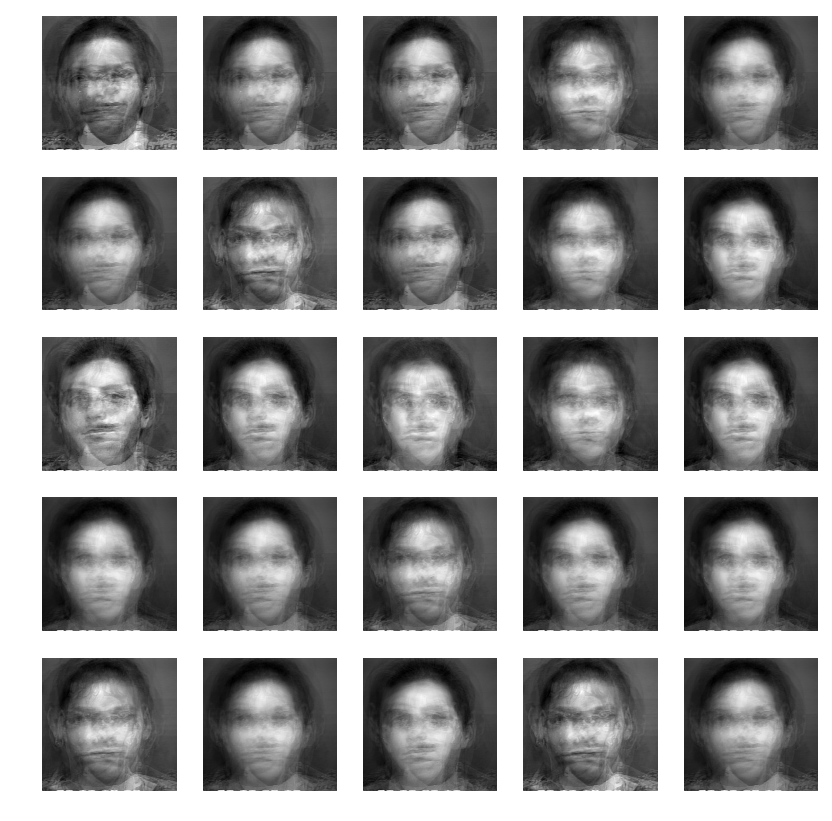

K =  15


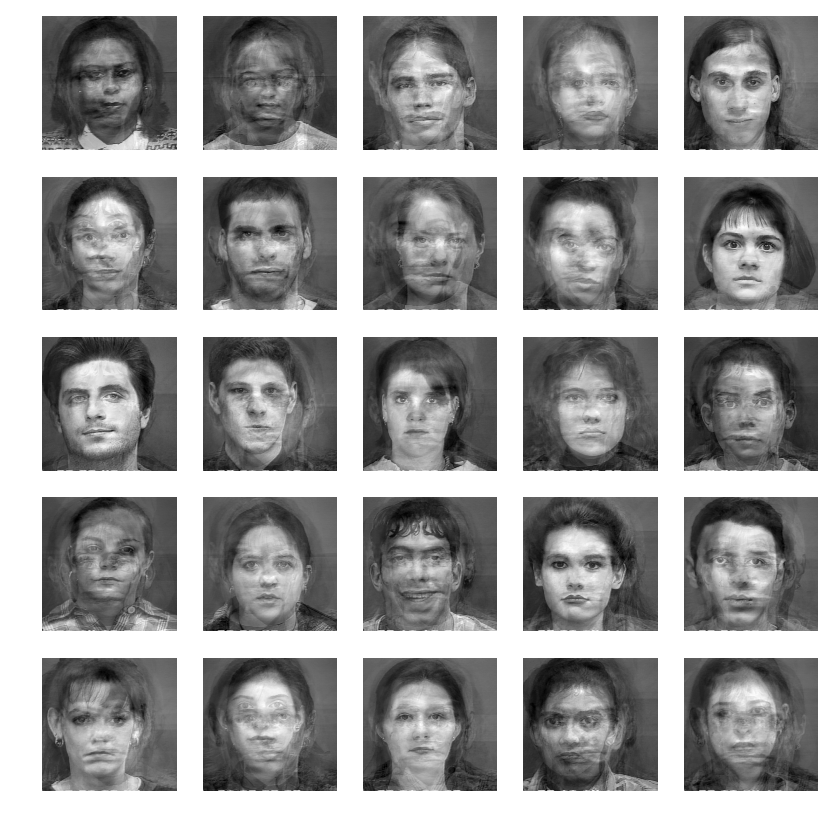

K =  24


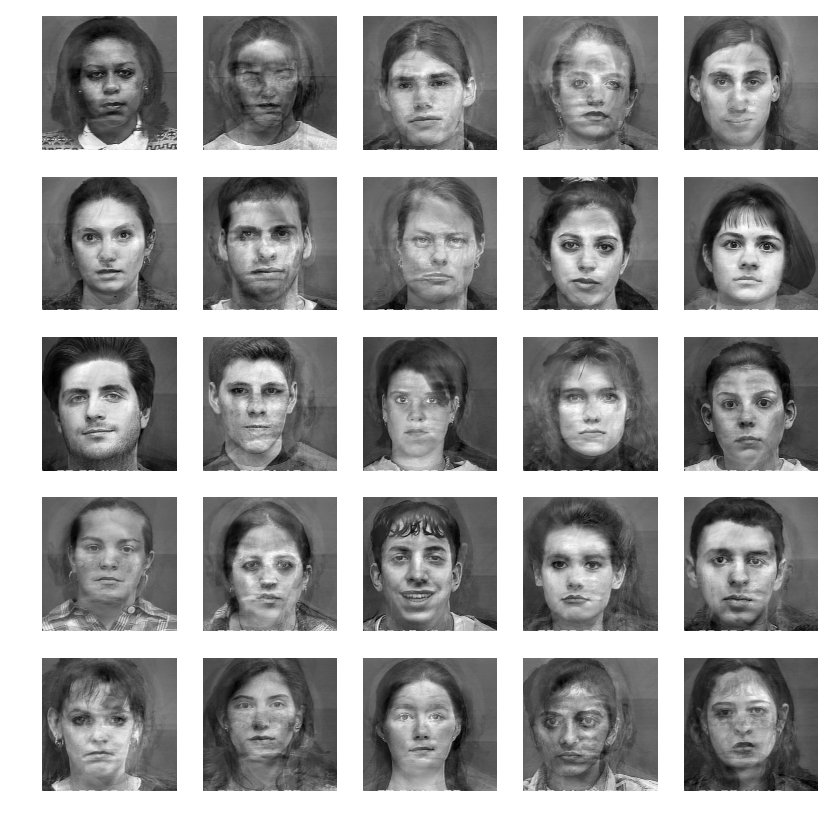

In [3]:
def reconstruct_faces(k):
    column_eigfaces = row_eigenfaces.T

    k_col_eigfaces = column_eigfaces[0:k]
    k_col_eigenVectors = eigenVectors[0:k]
    projected_k = np.dot(k_col_eigfaces.T, k_col_eigenVectors)
    # norm = LA.norm(projected_k)
    # projected_k = projected_k/norm


    fig4, axes_array = plt.subplots(5, 5)
    fig4.set_size_inches(10,10)
    axes_array=np.ravel(axes_array)
    j = 0
    print('K = ',k)
    for j in range(0,size_v):
        reconstructed = np.add(mean_value, projected_k[:,j])
        big_norm_eig = reconstructed.reshape(height, width)

        eig_img = Image.fromarray(big_norm_eig)
        eig_img = eig_img.resize((100,100))
        image_plot = axes_array[j].imshow(big_norm_eig, cmap=plt.cm.gray)
        axes_array[j].axis('off')
    plt.show()
k = 2
reconstruct_faces(k)
k = 15
reconstruct_faces(k)
k = 24
reconstruct_faces(k)

# Task 3

K =  2


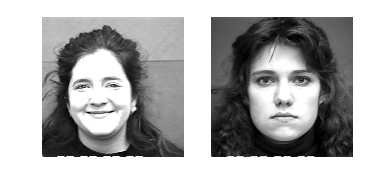

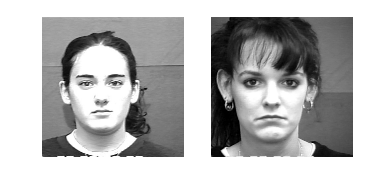

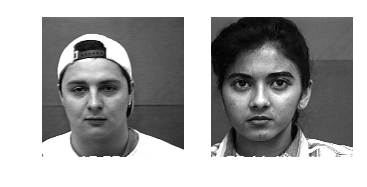

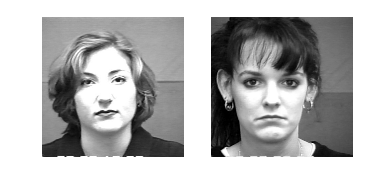

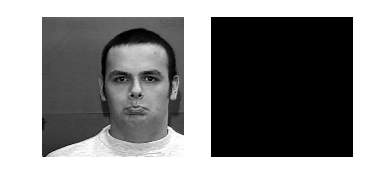

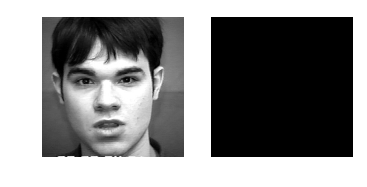

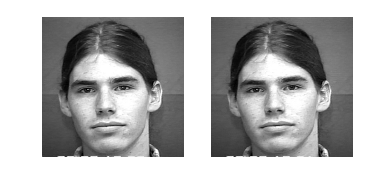

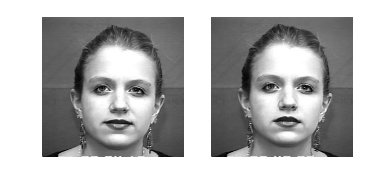

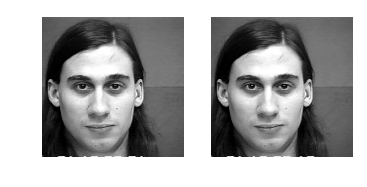

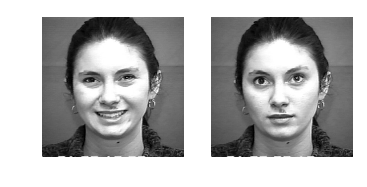

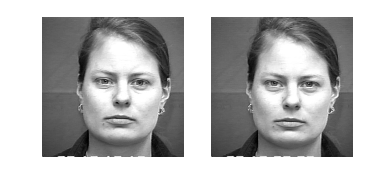

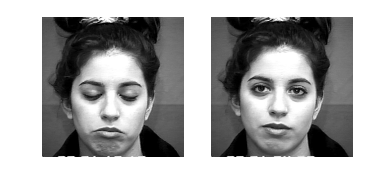

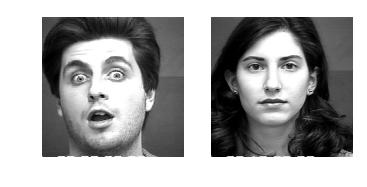

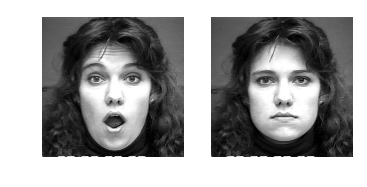

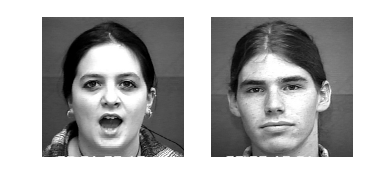

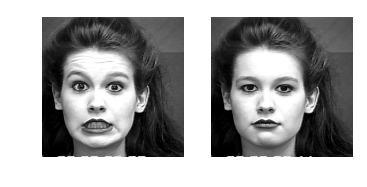

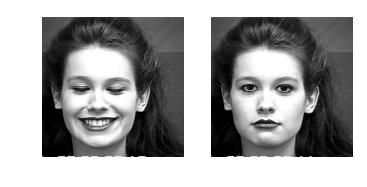

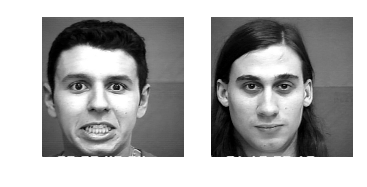

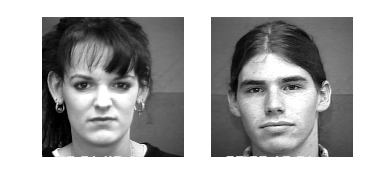

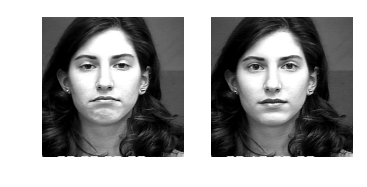

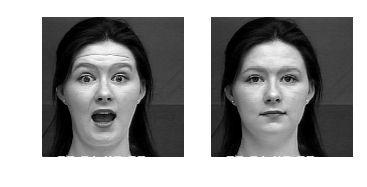

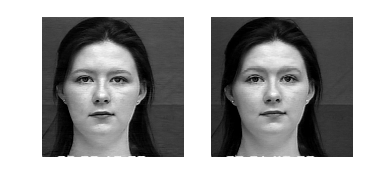

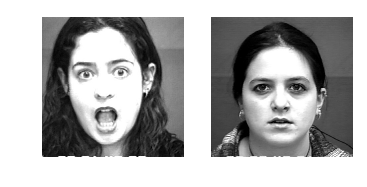

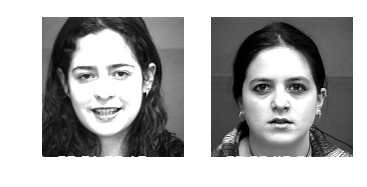

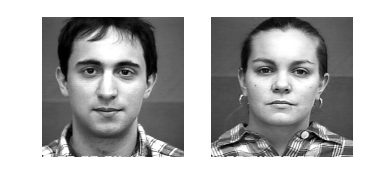

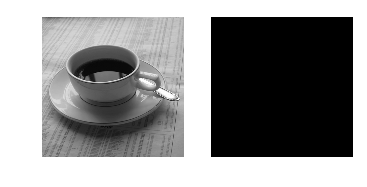

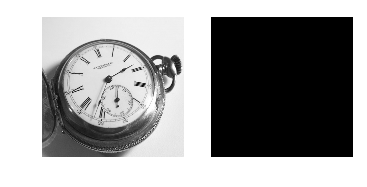

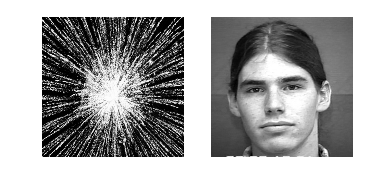

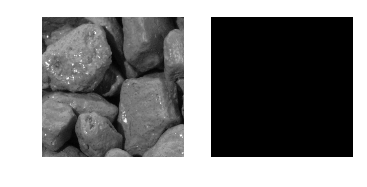

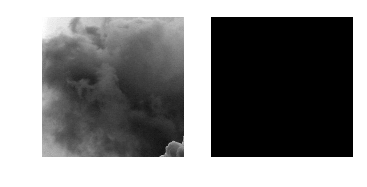

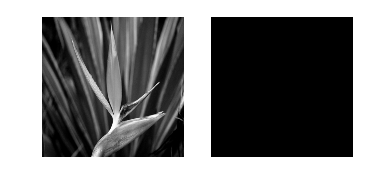

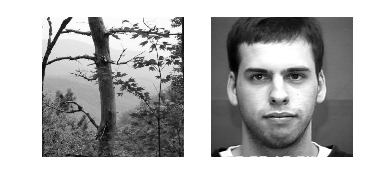

K =  5


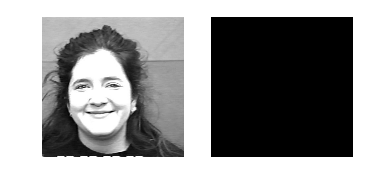

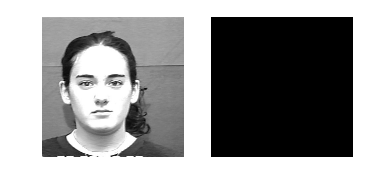

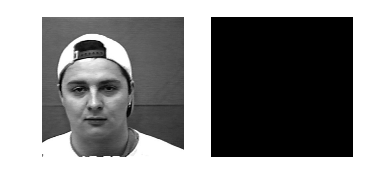

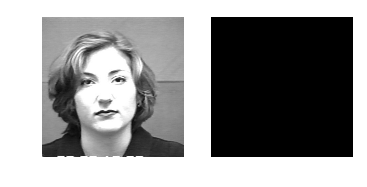

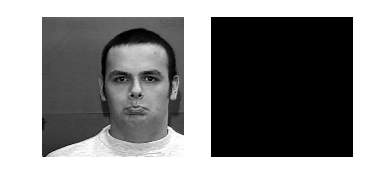

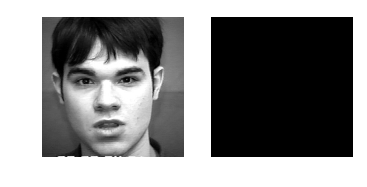

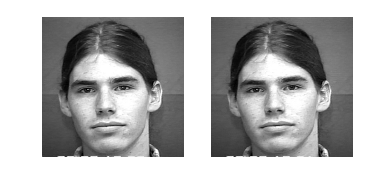

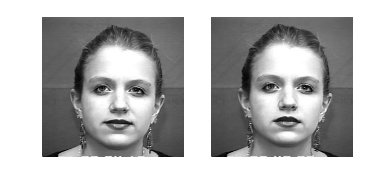

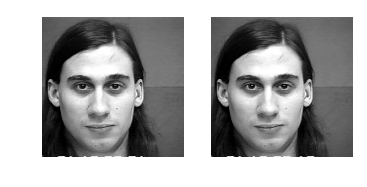

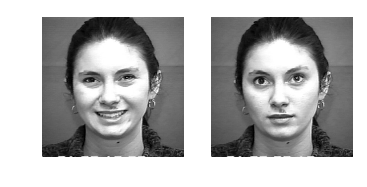

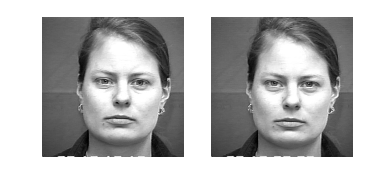

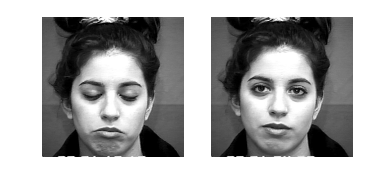

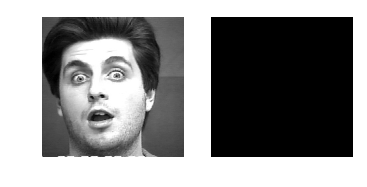

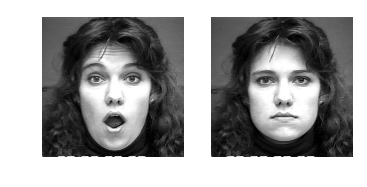

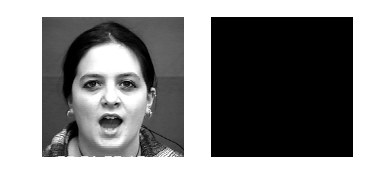

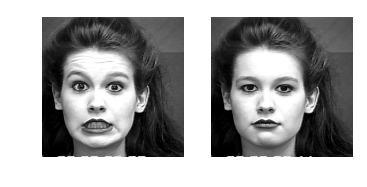

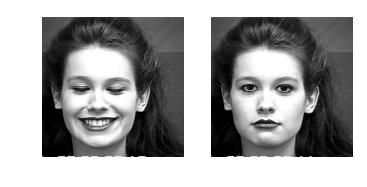

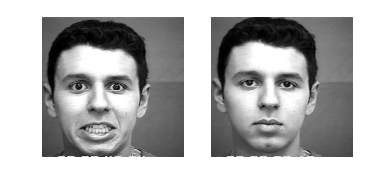

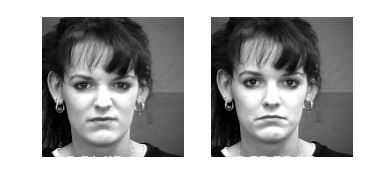

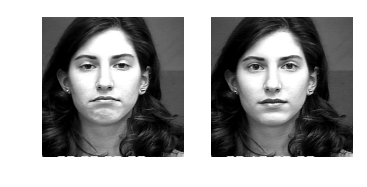

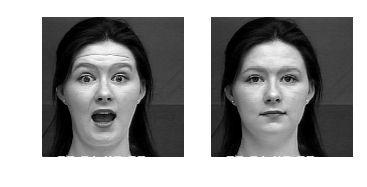

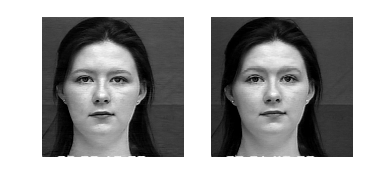

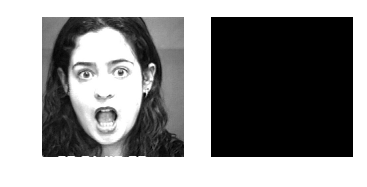

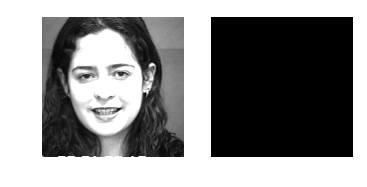

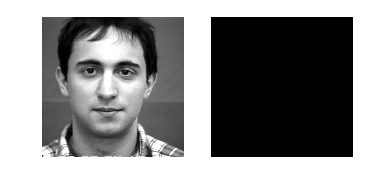

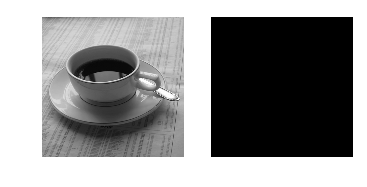

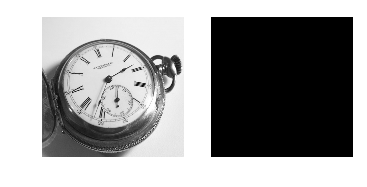

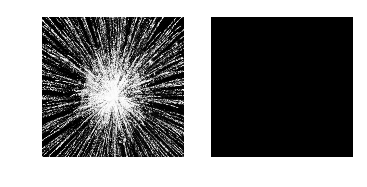

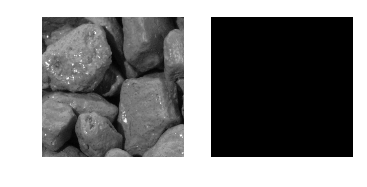

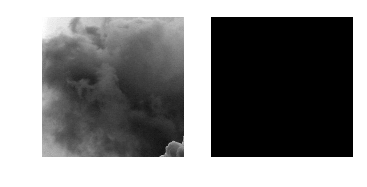

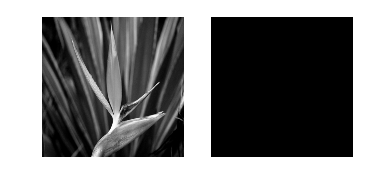

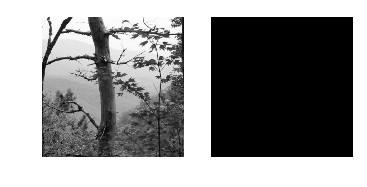

K =  15


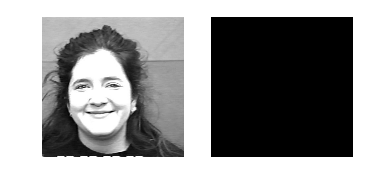

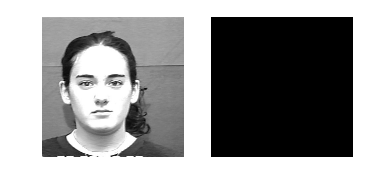

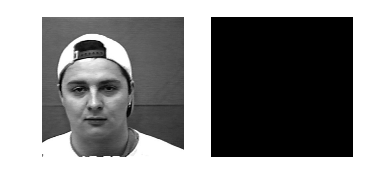

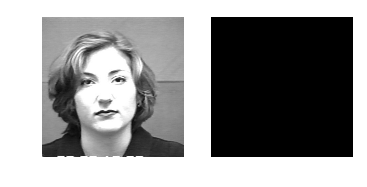

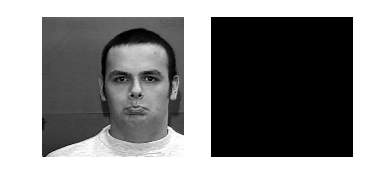

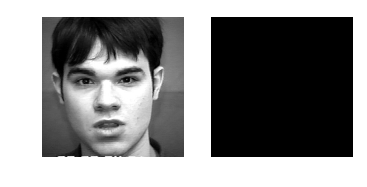

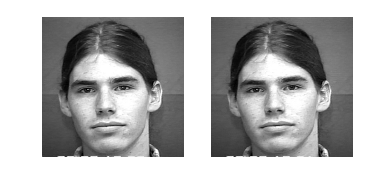

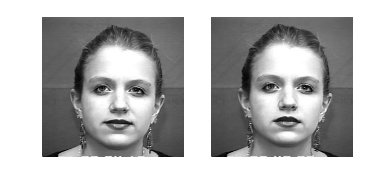

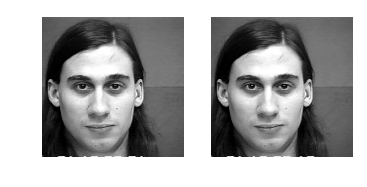

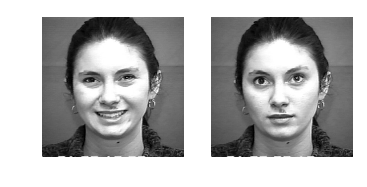

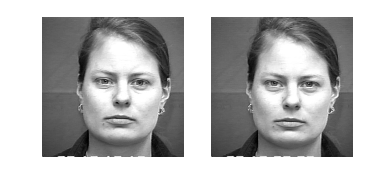

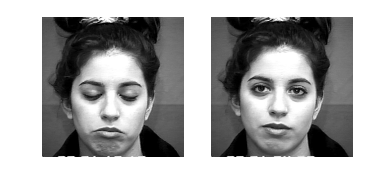

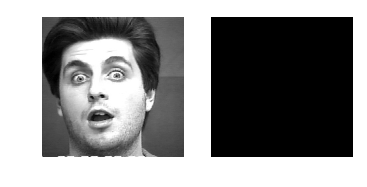

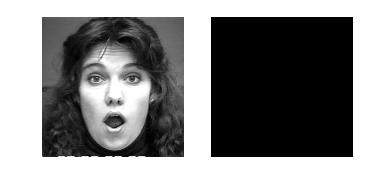

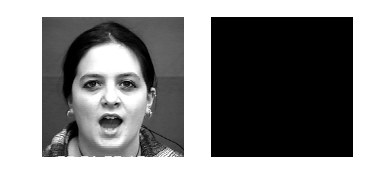

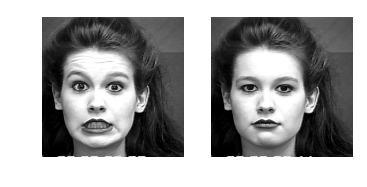

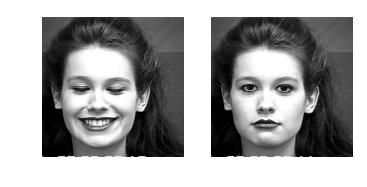

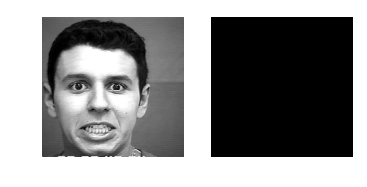

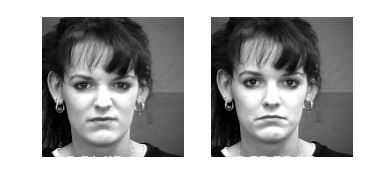

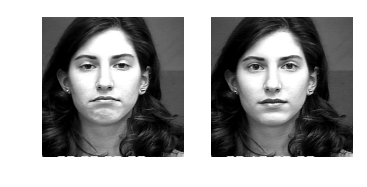

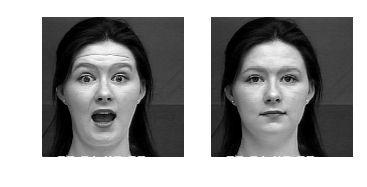

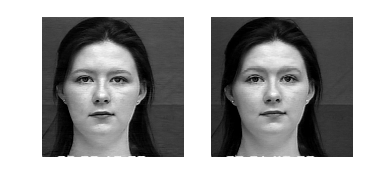

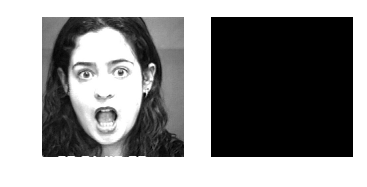

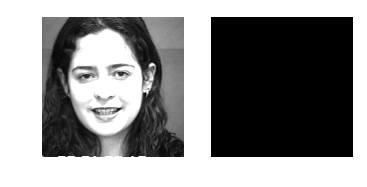

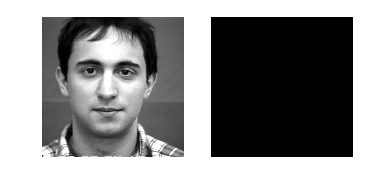

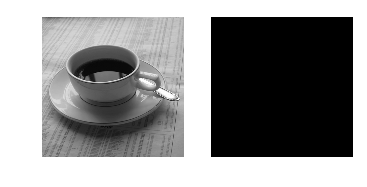

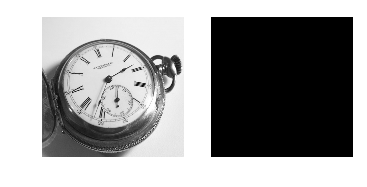

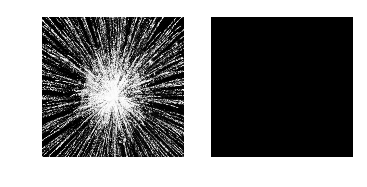

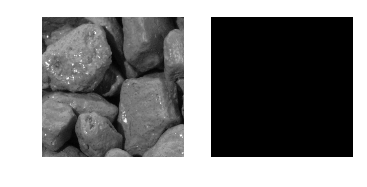

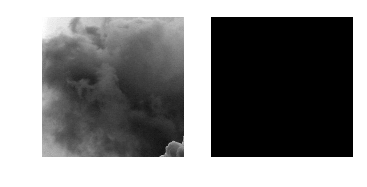

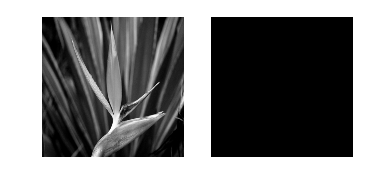

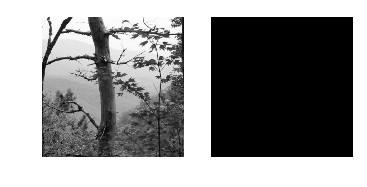

In [4]:
import glob
column_eigfaces = row_eigenfaces.T

def match_testfaces(k):
    k_col_eigfaces = column_eigfaces[0:k]
    
    trainfaces = []
    global training_class 
    training_class = np.zeros(no_of_trainig_samples)
    ii = 0
    for trainfile in glob.glob('Eigenfaces/Train/*.jpg'):
        #print(trainfile)
        if trainfile.endswith('.jpg'):
            training_class[ii] = trainfile[18:-17]
        train_image = Image.open(trainfile).convert("L")
        train_image_float = np.asarray(train_image,dtype=float)
        train_image_gray = train_image_float/255.0
        height, width = train_image_gray.shape
        test_image_1d = train_image_gray.flatten()
        trainfaces.append(test_image_1d)
        ii = ii + 1

    trainfaces_array = np.array(trainfaces)
    k_training_points = np.dot(trainfaces_array, k_col_eigfaces.T)
    #print(k_training_points.shape)
    training_size = len(trainfaces_array)
    
    global test_class 
    test_class = np.zeros(no_of_testing_samples)
    testfaces = []
    jj = 0
    for testfile in glob.glob('Eigenfaces/Test/*.jpg'):
        #print(testfile)
        if testfile.endswith('.jpg'):
            test_class[jj] = testfile[17:-17]
        test_image = Image.open(testfile).convert("L")
        test_image_float = np.asarray(test_image,dtype=float)
        test_image_gray = test_image_float/255.0
        height, width = test_image_gray.shape
        test_image_1d = test_image_gray.flatten()
        testfaces.append(test_image_1d)
        jj = jj + 1
        
    testfaces_array = np.array(testfaces)
    k_testing_points = np.dot(testfaces_array, k_col_eigfaces.T)
    #print(k_testing_points.shape)
    test_size = len(testfaces)
    

    min_distances = np.zeros(test_size)
    nearest_training = np.zeros(test_size)
    print('K = ',k)
    
    for i in range(0,test_size):
        
        a = k_testing_points[i,0:k]
        min_dist = 10000
        #print(a)
        for j in range(0,training_size):
            b = k_training_points[j, 0:k]
            dist = np.linalg.norm(a-b)
            if dist < min_dist:
                min_dist = dist
                min_distances[i] = dist
                nearest_training[i] = j
        testing_image = testfaces_array[int(i)]
        testing_image = testing_image.reshape(height, width)
        testing_sample_class = test_class[i]
        threshold = 500 * np.sqrt(k)
        if min_distances[i] < threshold :
            match_idx = nearest_training[int(i)]
            #print('Test : ', i,'Train : ', match_idx)
            matched_training_image = faces_array[int(match_idx)]
            matched_training_image = matched_training_image.reshape(height, width)
        else :
            matched_training_image = np.ones((height, width))
        
        #print('Test_Class : ', testing_sample_class,'Training_Class : ', testing_sample_matching)
        fig1, axes_array = plt.subplots(1, 2)
        fig1.set_size_inches(4,2)
        
        image_plot = axes_array[0].imshow(testing_image,cmap=plt.cm.gray) 
        axes_array[0].axis('off')
        image_plot = axes_array[1].imshow(matched_training_image,cmap=plt.cm.gray)
        axes_array[1].axis('off')
        plt.show()

k = 2
match_testfaces(k)
k = 5
match_testfaces(k)
k = 15
match_testfaces(k)

# Task 4

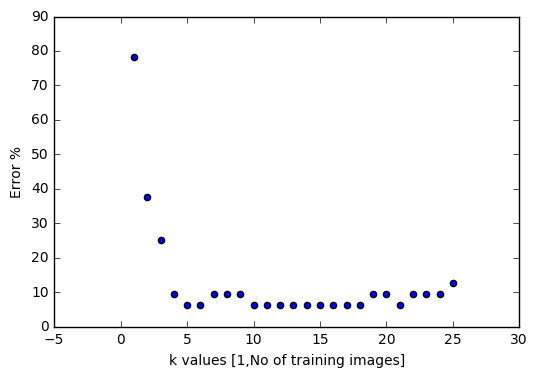

In [5]:
def match_testfaces_find_accuracy(k):
    k_col_eigfaces = column_eigfaces[0:k]
    
    trainfaces = []
    global training_class 
    training_class = np.zeros(no_of_trainig_samples)
    ii = 0
    for trainfile in glob.glob('Eigenfaces/Train/*.jpg'):
        #print(trainfile)
        if trainfile.endswith('.jpg'):
            training_class[ii] = trainfile[18:-17]
        train_image = Image.open(trainfile).convert("L")
        train_image_float = np.asarray(train_image,dtype=float)
        train_image_gray = train_image_float/255.0
        height, width = train_image_gray.shape
        test_image_1d = train_image_gray.flatten()
        trainfaces.append(test_image_1d)
        ii = ii + 1

    trainfaces_array = np.array(trainfaces)
    k_training_points = np.dot(trainfaces_array, k_col_eigfaces.T)
    #print(k_training_points.shape)
    training_size = len(trainfaces_array)
    
    global test_class 
    test_class = np.zeros(no_of_testing_samples)
    testfaces = []
    jj = 0
    for testfile in glob.glob('Eigenfaces/Test/*.jpg'):
        #print(testfile)
        if testfile.endswith('.jpg'):
            test_class[jj] = testfile[17:-17]
        test_image = Image.open(testfile).convert("L")
        test_image_float = np.asarray(test_image,dtype=float)
        test_image_gray = test_image_float/255.0
        height, width = test_image_gray.shape
        test_image_1d = test_image_gray.flatten()
        testfaces.append(test_image_1d)
        jj = jj + 1
        
    testfaces_array = np.array(testfaces)
    k_testing_points = np.dot(testfaces_array, k_col_eigfaces.T)
    #print(k_testing_points.shape)
    test_size = len(testfaces)
    

    min_distances = np.zeros(test_size)
    nearest_training = np.zeros(test_size)
    #print('K = ',k)
    tp_count = 0
    fp_count = 0
    fn_count = 0
    tn_count = 0
    
    for i in range(0,int(test_size)):
        
        a = k_testing_points[i,0:k]
        min_dist = 10000
        #print(a)
        for j in range(0,training_size):
            b = k_training_points[j, 0:k]
            dist = np.linalg.norm(a-b)
            if dist < min_dist:
                min_dist = dist
                min_distances[i] = dist
                nearest_training[i] = j
        testing_image = testfaces_array[int(i)]
        testing_image = testing_image.reshape(height, width)
        testing_sample_class = test_class[i]
        
        #print(i)
        if i < no_of_trainig_samples:
            thr = threshold1[i]
        else :
            thr = 300 * np.sqrt(k)
        #print(thr)
        #threshold = 300 * np.sqrt(k)
        if min_distances[i] < thr :
            match_idx = nearest_training[int(i)]
            #print('Test : ', i,'Train : ', match_idx)
            matched_training_image = faces_array[int(match_idx)]
            matched_training_image = matched_training_image.reshape(height, width)
            testing_sample_matching = training_class[int(match_idx)]
            if testing_sample_class == testing_sample_matching:
                tp_count = tp_count + 1
            else:
                fp_count = fp_count + 1
        else :
            matched_training_image = np.ones((height, width))
            testing_sample_matching = 0
            if testing_sample_class in training_class:
                fn_count = fn_count + 1
            else:
                tn_count = tn_count + 1
    
    #print('tp_count',tp_count,'fp_count',fp_count,'fn_count',fn_count,'tn_count',tn_count)
    accuracy = (fp_count+fn_count)/test_size
    #print(accuracy)
    return accuracy

threshold1 = [ 300,500,1000,1000,1000,1000,2800,2800,2800,2800,2800,2800,2800,4800,4800,4800,4000,4000,5200,5200,5200,5200,6400,4400,4400,4400]

accuracy = np.zeros(no_of_trainig_samples + 1)
for k_value in range(1,no_of_trainig_samples+1):
    accuracy[k_value] = match_testfaces_find_accuracy(k_value)
#print(accuracy)

k_values = np.linspace(1,no_of_trainig_samples,no_of_trainig_samples)
accuracies = np.array(accuracy * 100)
plt.scatter(k_values,accuracies[1:no_of_trainig_samples+1])
plt.xlabel('k values [1,No of training images]')
plt.ylabel('Error %')
plt.show()